In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('./emails.csv')

In [3]:
# Remove null values
df.dropna(inplace=True)

In [4]:
# Define a function to retain common English characters and symbols
def clean_body(text):
    # Use regular expressions to retain English characters, numbers, and common symbols (such as periods, commas, exclamation marks, question marks, etc.)
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s.,!?;:()'\"]", "", text)
    return cleaned_text

In [5]:
df['body'] = df['body'].apply(clean_body)

In [6]:
# Remove duplicate values
df_cleaned = df.drop_duplicates(subset=['subject', 'sender', 'recipients', 'body'])

In [7]:
df_cleaned.head(10)

,subject,sender,recipients,body
0,Re: Newsgroups,billc@greenbuilder.com,strawbale@crest.org,What other cool newsgroups are available for u...
1,assoc. for west desk,phillip.allen@enron.com,celeste.roberts@enron.com,"Celeste, I need two assoc.analyst for the west..."
2,Re:,phillip.allen@enron.com,william.kelly@enron.com,"Will, I didn't get to review this. I will give..."
3,Re: Electric Overage (1824.62),phillip.allen@enron.com,stagecoachmama@hotmail.com,"Lucy, I will call you this afternoon to discus..."
4,Daily Duties,phillip.allen@enron.com,pallen70@hotmail.com,Forwarded by Phillip K AllenHOUECT on 0820200...
5,New Associate Orientation - February 12 - Febr...,tracy.arthur@enron.com,"steve.jacobellis@enron.com, mauricio.mora@enro...",New Associate Orientation As new participant w...
6,For Wade,phillip.allen@enron.com,stagecoachmama@hotmail.com,"Wade, I understood your number one priority wa..."
7,Westgate,phillip.allen@enron.com,pallen70@hotmail.com,Forwarded by Phillip K AllenHOUECT on 1003200...
8,Stick it in your Shockmachine!,phillip.allen@enron.com,pallen70@hotmail.com,Forwarded by Phillip K AllenHOUECT on 121199 ...
10,re: apt. #2,phillip.allen@enron.com,maryrichards7@hotmail.com,Go ahead and level the floor in 2.


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231200 entries, 0 to 490844
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   subject     231200 non-null  object
 1   sender      231200 non-null  object
 2   recipients  231200 non-null  object
 3   body        231200 non-null  object
dtypes: object(4)
memory usage: 8.8+ MB


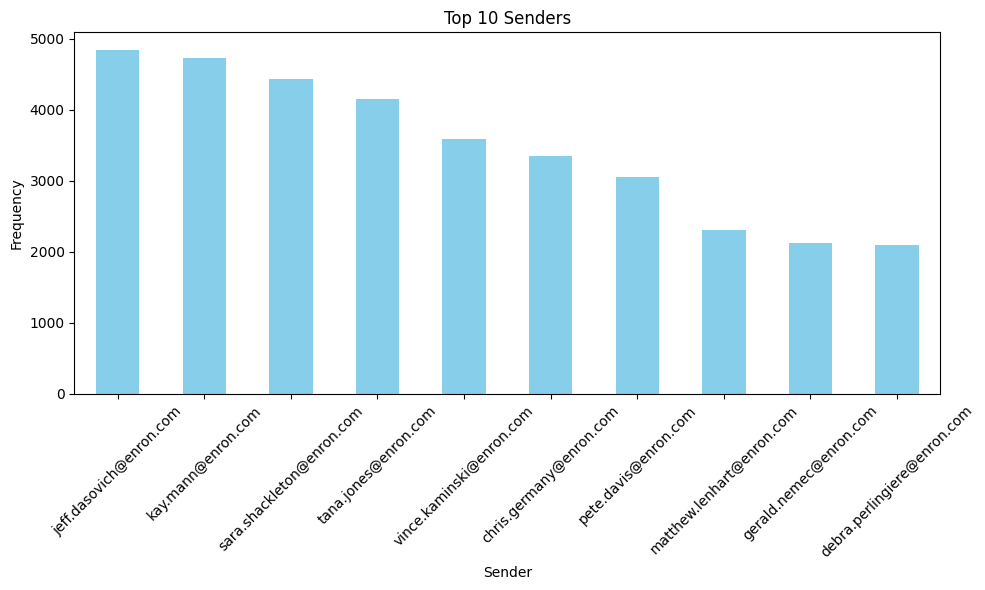

In [9]:
# Count the top 10 senders and use plt to plot
top_10_senders = df_cleaned['sender'].value_counts().head(10)
# Draw a bar chart
plt.figure(figsize=(10, 6))
top_10_senders.plot(kind='bar', color='skyblue')
plt.title('Top 10 Senders')
plt.xlabel('Sender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying images
plt.show()

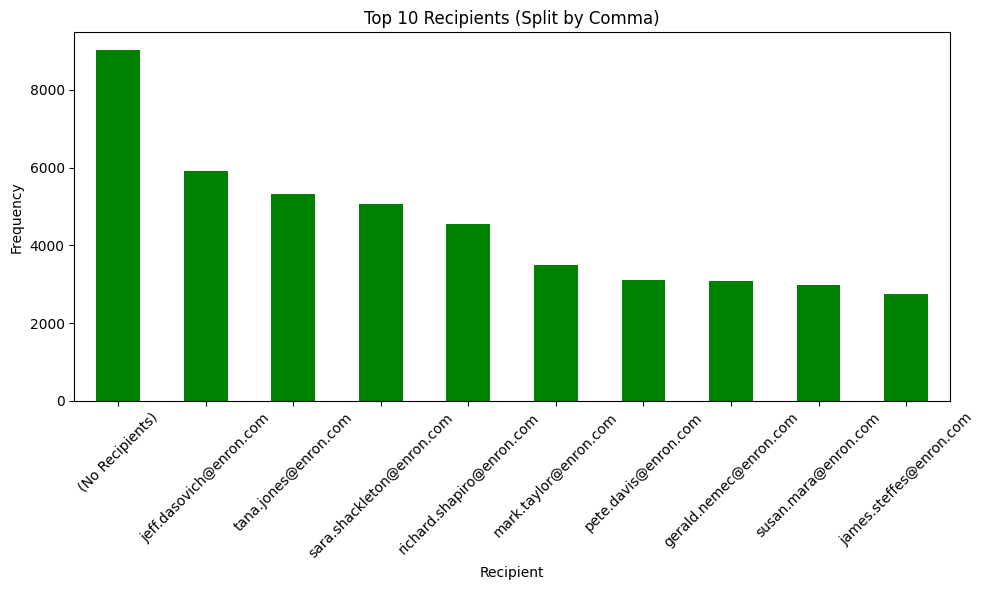

In [10]:
# Split multiple recipients in the 'recipients' column into individual recipients and expand them into multiple rows
df_recipients_cleaned = df_cleaned[df_cleaned['recipients'] != '(No Recipients)']
df_recipients_split = df_cleaned['recipients'].str.split(', ', expand=True).stack().reset_index(drop=True)
# Count the top 10 most common recipients
top_10_recipients_split = df_recipients_split.value_counts().head(10)
# Draw a bar chart
plt.figure(figsize=(10, 6))
top_10_recipients_split.plot(kind='bar', color='green')
plt.title('Top 10 Recipients (Split by Comma)')
plt.xlabel('Recipient')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
# Displaying images
plt.show()

In [11]:
# Define a function to clean and split the text in the body column
def clean_and_split(text):
    # Convert to lowercase and remove punctuation, leaving only letters and numbers
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Split into words by spaces
    words = text.split()
    return words

In [12]:
# Apply to the body column and aggregate all words into a list
df_cleaned['body'] = df_cleaned['body'].fillna('').astype(str)
all_words = df_cleaned['body'].apply(clean_and_split).explode()
df_cleaned.to_csv('./df_cleaned.csv', index=False)

C:\Users\26856\AppData\Local\Temp\ipykernel_51796\392441183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['body'] = df_cleaned['body'].fillna('').astype(str)


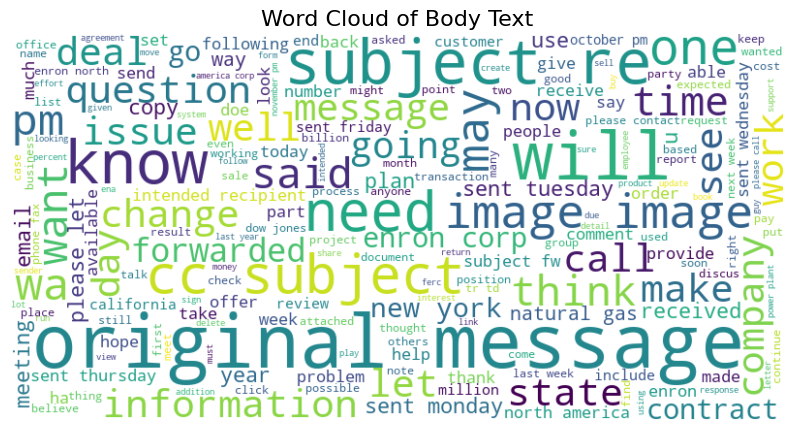

In [13]:
# Generate word cloud text content
all_words = all_words.dropna()  # Remove null values
all_words = all_words.astype(str)  # Make sure all elements are strings
wordcloud_text = ' '.join(all_words.tolist())

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

# Draw a word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Close Axes
plt.title('Word Cloud of Body Text', fontsize=16)
plt.show()